In [1]:
# importing the neceassary packages
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# reading in the dataset
df = pd.read_csv('titanic_data.csv')

# What factors made people more likely to survive?

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!

The descriptions of the variables from the Kaggle website are as follows:

#### VARIABLE DESCRIPTIONS:
* __survival__     Survival
    + (0 = No; 1 = Yes)
* __pclass__     Passenger Class
    + (1 = 1st; 2 = 2nd; 3 = 3rd)
* __name__     Name
* __sex__     Sex
* __age__     Age
* __sibsp__     Number of Siblings/Spouses Aboard
* __parch__     Number of Parents/Children Aboard
* __ticket__     Ticket Number
* __fare__     Passenger Fare
* __cabin__     Cabin
* __embarked__     Port of Embarkation
    + (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
%matplotlib inline

Let's take a quick look at the data:

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
print df.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Just looking at the data doesn't tell us much.  Let's look at how many passengers survived and how many died; as we can see below, more passengers died rather than survived. However, since not all passengers were like each other so let's look at a couple more variables.

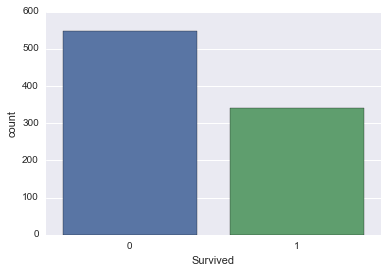

In [6]:
sns.countplot(x="Survived", data=df)

## Age, Class, and Sex

Intuitively, I would assume that survival rate would vary by passenger class (__pclass__), age (__Age__), and gender (__sex__).

Let's first look at at the distribution of survivors by __Age__.  There are missing values here due to how the data was collected.  Depending on what the missing values "should" be, this could give us an inaccurate look at the data, especially since approximately 20% of the data is missing.

For this analysis, I will exclude them although for good predictive performace, I will need to use alternate means of dealing with missing values in the future.

In [7]:
# count how many values in age
len(df["Age"])

891

In [8]:
# get number of missing values in the age variable
df["Age"].isnull().sum()

177

In [9]:
#proportion of missing data
177.0/891.0

0.19865319865319866

It seems like there are quite a few values close to zero.

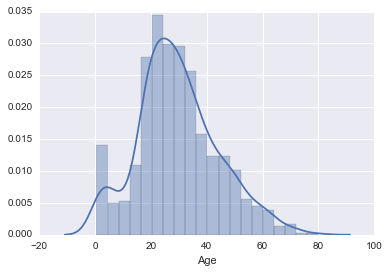

In [10]:
titanic_ages = df["Age"].dropna()

sns.distplot(titanic_ages);

In [11]:
titanic_ages.sort_values( ascending = True ).head()

803    0.42
755    0.67
644    0.75
469    0.75
78     0.83
Name: Age, dtype: float64

There are many values in age less than 1.0 years of age but since there were children aboard the titanic so I will assume these are babies and children.

And let's see how both age and gender are distributed amongst who survived or died.

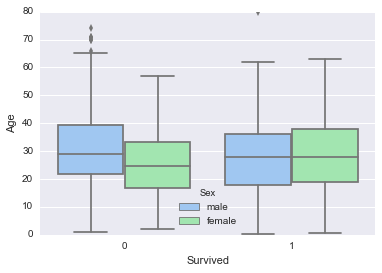

In [12]:
sns.boxplot(x="Survived", y="Age", hue="Sex", palette="pastel", data=df);

It looks like male survivors were younger while female survivors were older.

Let's look at the same graph but with __Fare__ replacing __Age__.  Most passengers paid an average of 32.2 in the currency of that time but we can also see that there are quite a few outliers (skewed right) as well since the median of 14.4542 is more than half of 32.2.

In [13]:
df["Fare"].mean( skipna=True )

32.2042079685746

In [14]:
df["Fare"].median( skipna=True )

14.4542

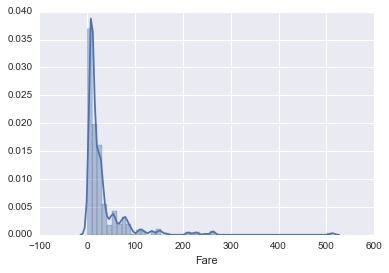

In [15]:
sns.distplot(df["Fare"]);

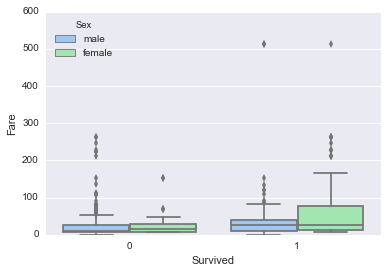

In [16]:
sns.boxplot(x="Survived", y="Fare", hue="Sex", palette="pastel", data=df);

Looking at a combination of __Age__ and __Fare__, it looks like younger male passengers who paid a higher fare generally had a higher rate of survival and older female passengers who paid a higher fare had a higher rate of survival.  However, when we look at the below barchart, we can see that women disproportionately were in the survivor group no matter what passenger class they were in.

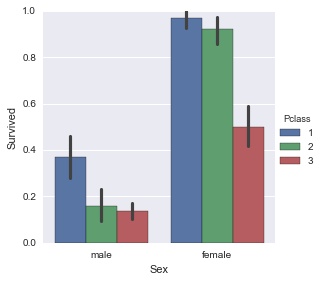

In [17]:
sns.factorplot(x="Sex", y="Survived", hue="Pclass", data=df, kind="bar");

If we group the data by class, we can see that more people survived when they were in first class.  If a passenger was in second or third class, they were more likely to die.

In [18]:
df.groupby(['Pclass', 'Survived']).sum()

PassengerId      Age  SibSp  Parch        Fare
Pclass Survived                                                
1      0               32824  2796.50     23     24   5174.7206
       1               66881  4314.92     67     53  13002.6919
2      0               43856  3019.00     31     14   1882.9958
       1               38200  2149.83     43     56   1918.8459
3      0              168732  7170.00    250    143   5085.0035
       1               46893  1754.92     52     50   1629.6916

When we add in what port the passengers embarked from, we see that first class passengers who embarked from Cherbourg has around 0.7 probability of surviving and second class passengers from Queenstown had a similar probability of surviving.  Third class passengers from any port had less than a 0.4 probability of surviving.

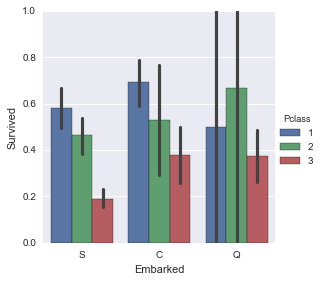

In [19]:
sns.factorplot(x="Embarked", y="Survived", hue="Pclass", data=df, kind="bar");

## Conclusions

Some important variables in determining who survived the sinking of the Titanic were sex, passenger class, and to some extent age.


It's important to look at how all of the available variables interact with each other to truly predict who survived and who did not.  In order words, we will need more robust statistical methods in order to draw more concrete conclusions about what caused/influenced the survival rates of the passengers.  Our conclusions here are limited by our lack of ability to do statistical testing.  The above analysis is simply a tentative look at what factors may influence what type of passenger survived.  Additionally, there may be other pieces of data that could have been useful in analysing the titanic population but they were not available to us.